In [ ]:
# Importing libraries and fetching data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<Axes: xlabel='v1', ylabel='count'>

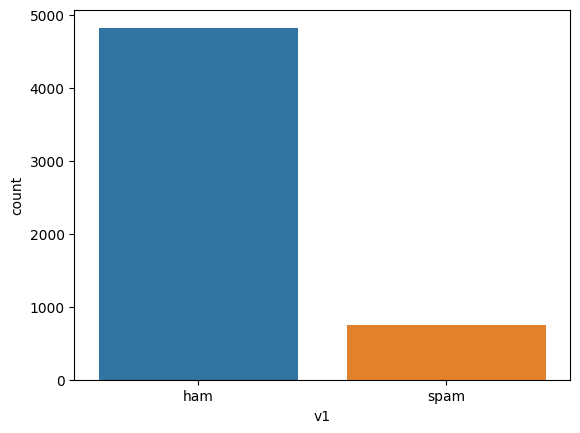

In [ ]:
sns.countplot(x=data.v1)

In [ ]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data["Unnamed: 2"].value_counts().head()

 bt not his girlfrnd... G o o d n i g h t . . .@"       3
 PO Box 5249                                            2
this wont even start........ Datz confidence.."         2
GN                                                      2
 don't miss ur best life for anything... Gud nyt..."    2
Name: Unnamed: 2, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def simplify_data(data):


    data = pd.read_csv("spam.csv")
    data["Spam"] = data.v1.map({'ham':0, 'spam':1})
    data["Text"] = data.v2.str.lower()
    data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')
    data = data.drop(["v1", "v2", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
    return data

def remove_stopwords(message):


    stop_words = set(stopwords.words('english'))
    message = message.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in message.split() if word not in stop_words and len(word) > 2]
    return " ".join(text)

def text_length(text):
    return len(text)

def format_length(data):
    data["Length"] = data.Text.apply(text_length)
    data.Length = pd.cut(data.Length, [-1, 10, 20, 30, 50, 75, 100, 999], labels=[10,20,30,50,75,100,200])
    return data

def apply_transformations(data):
    data = simplify_data(data)
    data.Text = data.Text.apply(remove_stopwords)
    data = format_length(data)
    return data

data = apply_transformations(data)
data.head()

<ipython-input-33-6b98c70a6cc9>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')


,Spam,Text,Length
0,0,jurong point crazy available bugis great world...,75
1,0,lar joking wif oni,20
2,1,free entry wkly comp win cup final tkts may te...,100
3,0,dun say early hor already say,30
4,0,nah dont think goes usf lives around though,50


<Axes: xlabel='Length', ylabel='count'>

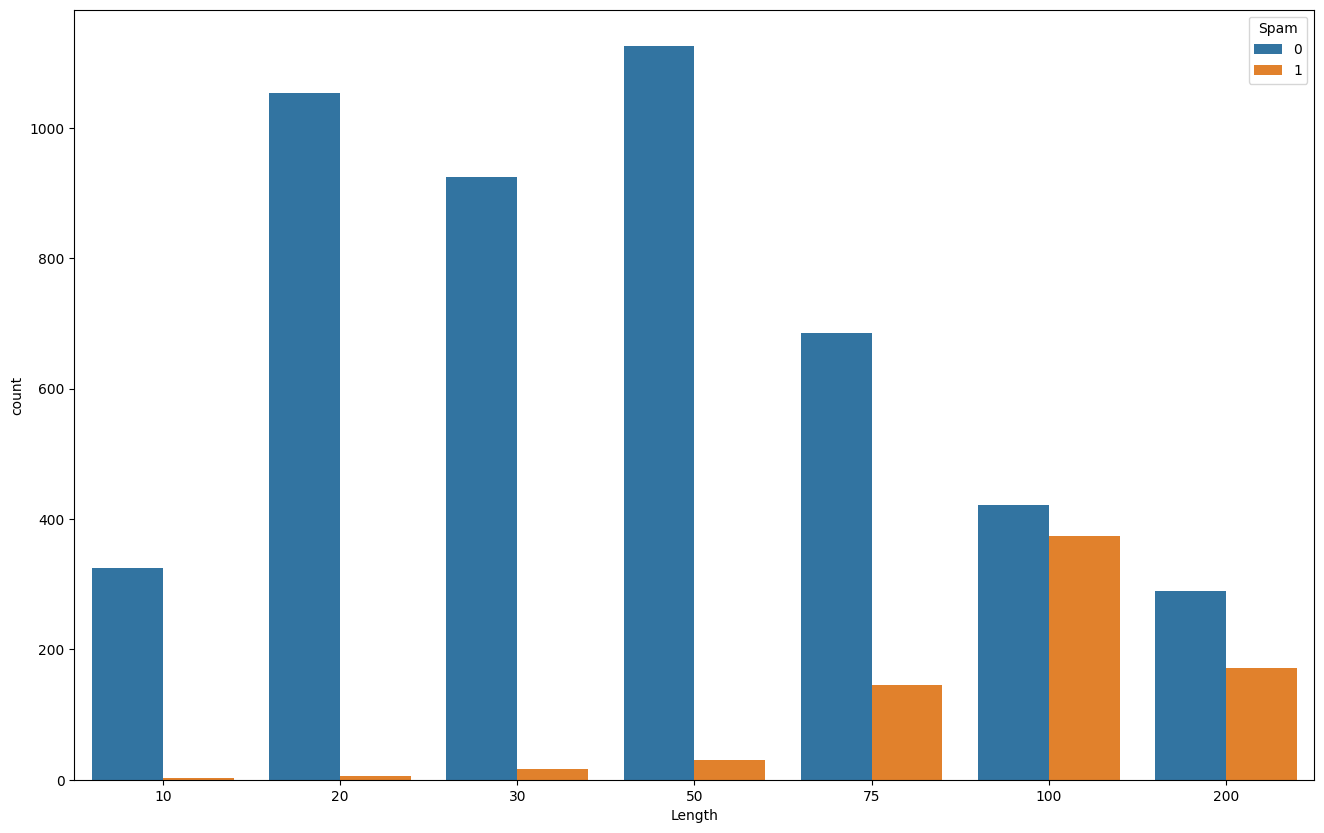

In [ ]:
plt.figure(figsize=(16,10))
plt.xlabel("Length")
plt.ylabel("Number of Spam messages")
sns.countplot(x=data.Length, hue=data.Spam)

In [ ]:
spam_words = []
ham_words = []

def getSpam(text):
    global spam_words, spam_messages
    messages = text.split()
    words = [x for x in messages]
    spam_words += words

def getHam(text):
    global ham_words, ham_messages
    messages = text.split()
    words = [x for x in messages]
    ham_words += words


spam_messages = data[data["Spam"] == 1]["Text"]
ham_messages = data[data["Spam"] == 0]["Text"]


spam_messages.apply(getSpam)
ham_messages.apply(getHam)


def countSpam(text):
    count = 0
    for x in text.split():
        if x in spam_words:
            count += spam_words.count(x)
    return count

def countHam(text):
    count = 0
    for x in text.split():
        if x in ham_words:
            count += ham_words.count(x)
    return count

def getCounts(data):
    SpamCount = data.Text.apply(countSpam)
    HamCount = data.Text.apply(countHam)
    data["Diff"] = SpamCount - HamCount
    return data

def categorize(diff):
    if diff <= 0:
        return 0
    else:
        return 1

def apply_calc(data):
    data = getCounts(data)
    data.Diff = data.Diff.apply(categorize)
    return data

data = apply_calc(data)
data.head()

,Spam,Text,Length,Diff
0,0,jurong point crazy available bugis great world...,75,0
1,0,lar joking wif oni,20,0
2,1,free entry wkly comp win cup final tkts may te...,100,1
3,0,dun say early hor already say,30,0
4,0,nah dont think goes usf lives around though,50,0


In [ ]:
spam_words.count("free")

219

In [ ]:
ham_words.count("free")

59

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(["Spam"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data.Spam, test_size=0.2, random_state=23)

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer
print("Accuracy on train data: ", accuracy_score(X_train.Diff, y_train))
print("Accuracy on test data: ", accuracy_score(X_test.Diff, y_test))

AttributeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X_train = X_train[["Length", "Diff"]]
X_test = X_test[["Length", "Diff"]]

clf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)


preds = clf.predict(X_test)

clf_acc = nb_acc = accuracy_score(y_test, preds)
print("Accuracy with RandomForestClassifier: ", accuracy_score(y_test, preds))


svc_clf = SVC(gamma='scale')
svc_clf.fit(X_train,y_train)
svc_preds = svc_clf.predict(X_test)

svc_acc = accuracy_score(y_test, svc_preds)
print("Accuracy with SVC: ", accuracy_score(y_test, svc_preds))

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
print("Accuracy with NaiveBayesian: ", accuracy_score(y_test, nb_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy with RandomForestClassifier:  0.957847533632287
Accuracy with SVC:  0.8780269058295964
Accuracy with NaiveBayesian:  0.9434977578475336


<Axes: xlabel='Length', ylabel='count'>

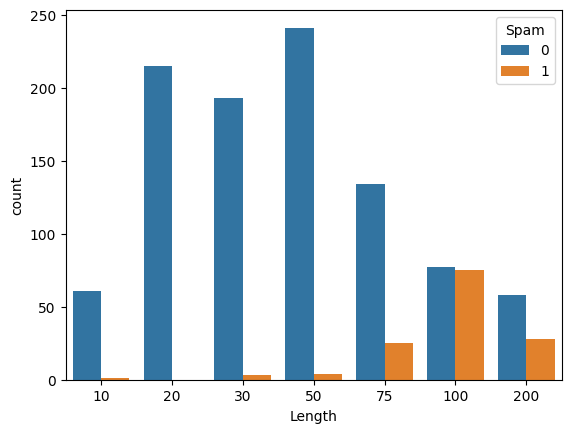

In [ ]:
sns.countplot(x=X_test.Length, hue=y_test)

In [ ]:
def manual_entry():
    global clf
    temp = pd.DataFrame(columns=["Text"])
    temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)

    temp = format_length(temp)
    temp = apply_calc(temp)
    temp = temp.drop(["Text"], axis=1)

    if temp.Diff.loc[0] == 1:
        print("Spam")
    else:
        print("Ham")

manual_entry()

Enter message: congratulations you won lottery of $2000000 click the link and claim
Spam


<ipython-input-46-02d4e9345c6e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data.Spam, data.Diff)

array([[4723,  102],
       [ 173,  574]])